# Optimize butterworth filter

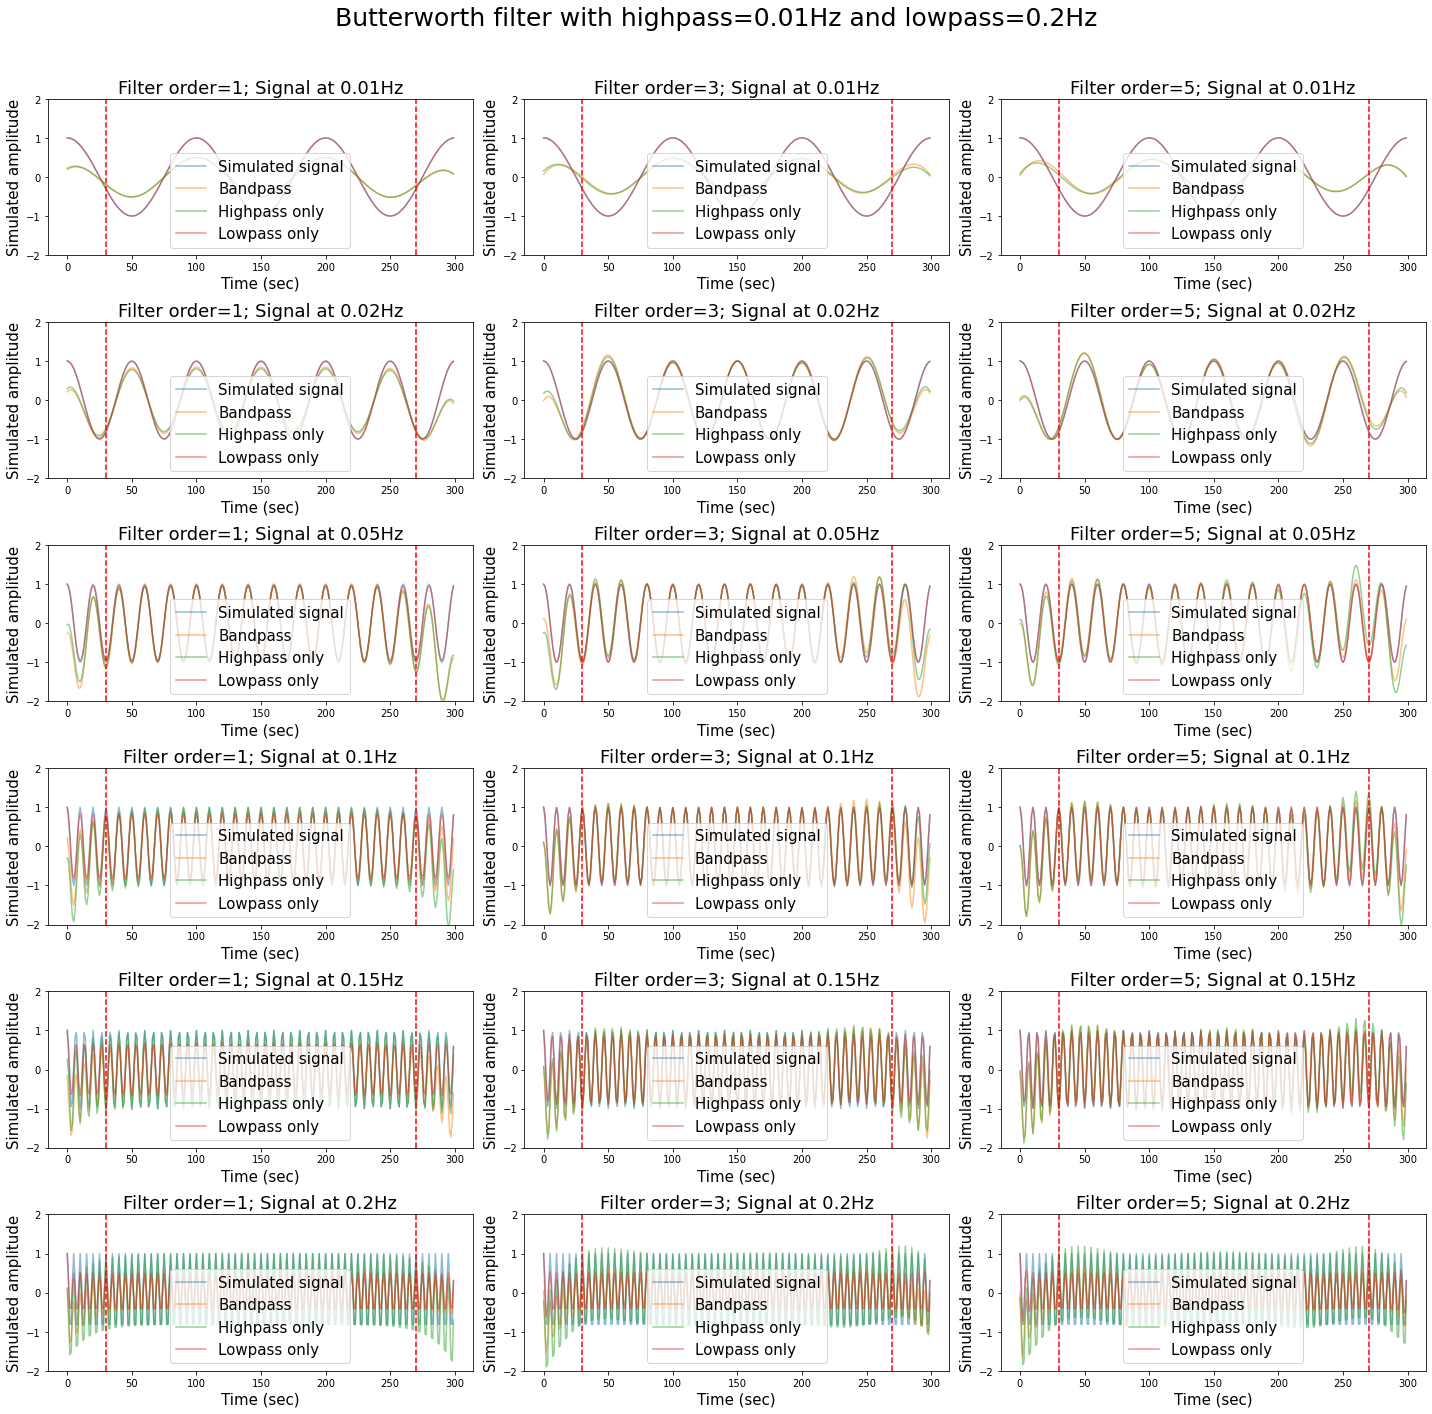

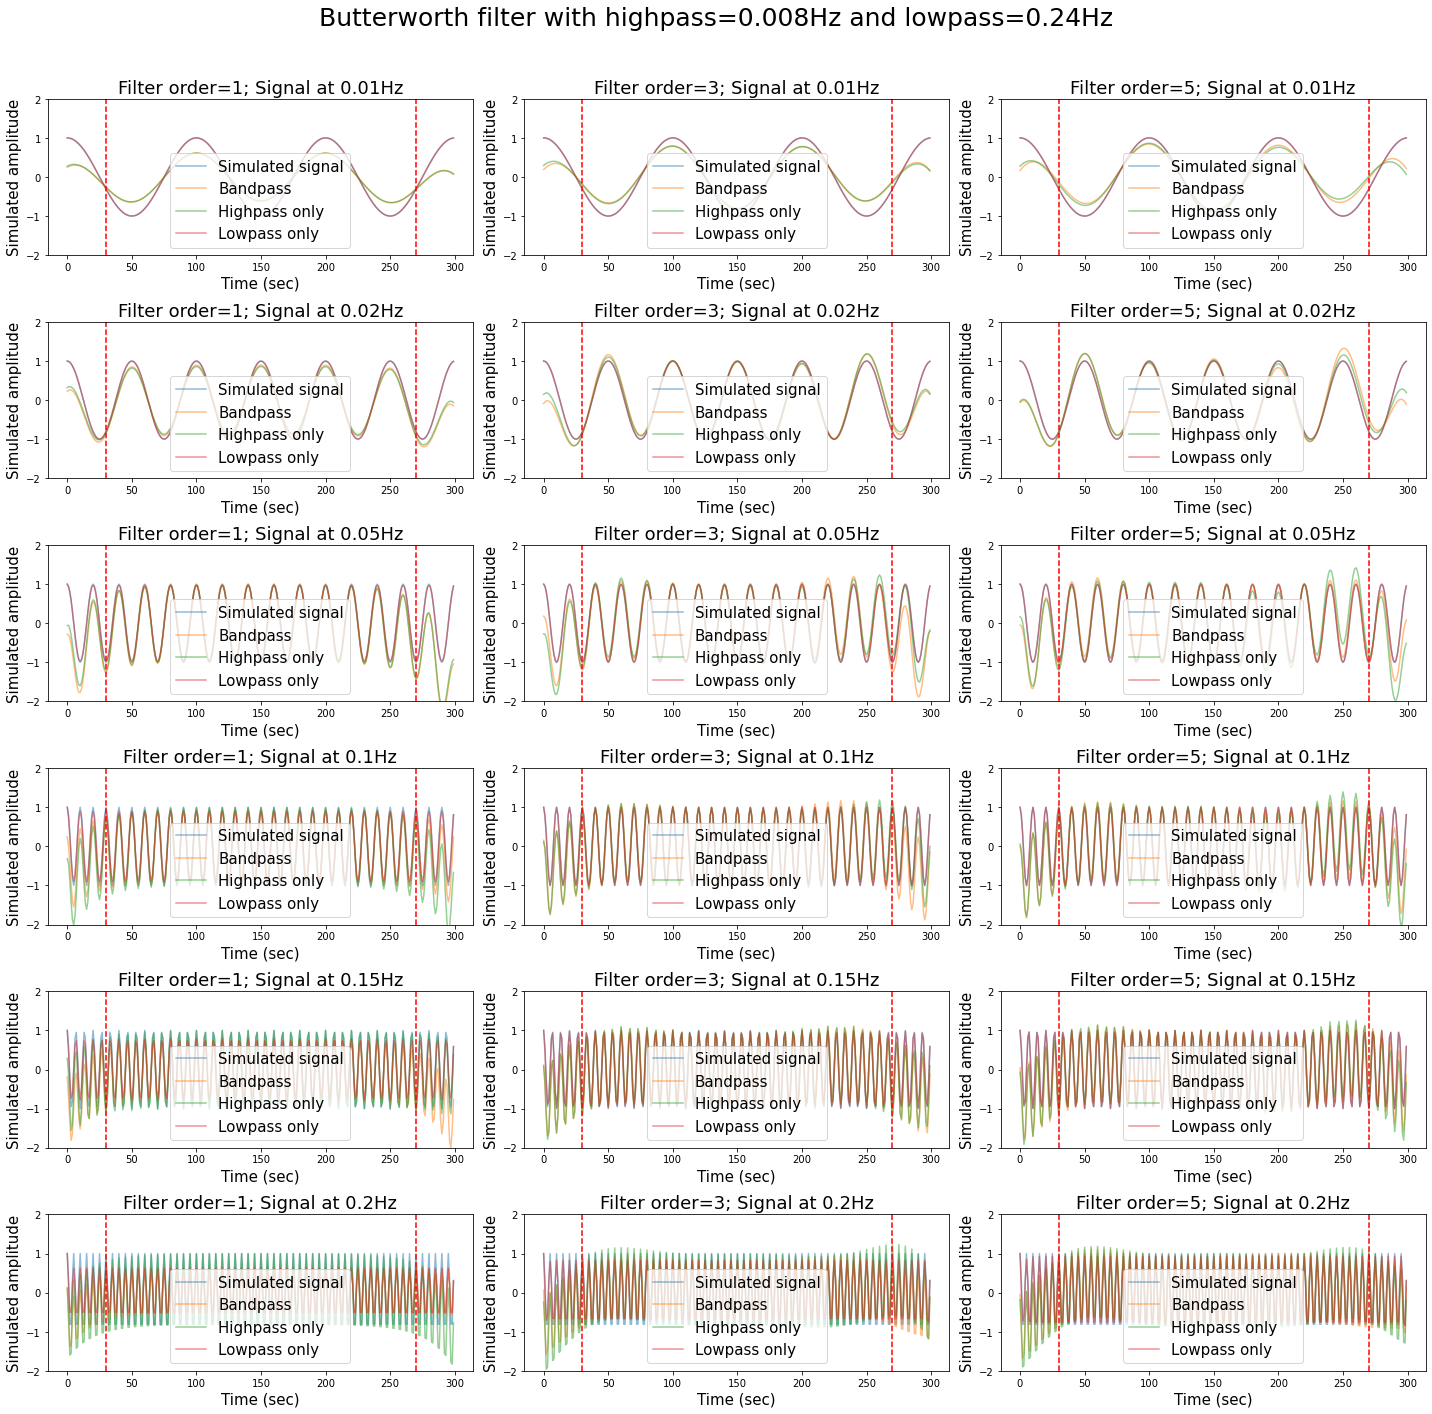

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, signal as sp_signal

# simulate sinusoidal timeseries
TR=1.0
time_len=300 # in sec
num_timepoints=int(time_len/TR)

t = np.linspace(0, time_len, num_timepoints, False)


orders=[1,3,5]
freqs=[0.01,0.02,0.05,0.1,0.15, 0.2]
fig,axes=plt.subplots(len(freqs),len(orders), figsize=(20,20))

critical_freq=[0.01,0.2]
fig.suptitle(f'Butterworth filter with highpass={critical_freq[0]}Hz and lowpass={critical_freq[1]}Hz\n\n', fontsize=25)

i=0
for order in orders:
    j=0
    for freq in freqs:
        ax=axes[j,i]
        ax.set_title(f'Filter order={order}; Signal at {freq}Hz', fontsize=18)
        ax.set_ylim([-2,2])
        ax.set_xlabel('Time (sec)', fontsize=15)
        ax.set_ylabel('Simulated amplitude', fontsize=15)

        signals = np.cos(2*np.pi*freq*t)
        
        ax.plot(signals, alpha=0.5)
        
        sos = sp_signal.butter(order, critical_freq, fs=1/TR, btype='band', output='sos')
        output = sp_signal.sosfiltfilt(sos, signals, axis=0)
        ax.plot(output, alpha=0.5)
        
        sos = sp_signal.butter(order, critical_freq[0], fs=1/TR, btype='high', output='sos')
        output = sp_signal.sosfiltfilt(sos, signals, axis=0)
        ax.plot(output, alpha=0.5)

        sos = sp_signal.butter(order, critical_freq[1], fs=1/TR, btype='low', output='sos')
        output = sp_signal.sosfiltfilt(sos, signals, axis=0)
        ax.plot(output, alpha=0.5)
        
        ax.legend(['Simulated signal', 'Bandpass', 'Highpass only', 'Lowpass only'], loc='lower center', fontsize=15)
        
        num_cut=int(30/TR) # cut the last 30 seconds
        ax.axvline(x=t[num_cut], linestyle='dashed', color='r')
        ax.axvline(x=t[-num_cut], linestyle='dashed', color='r')
        
        j+=1
    i+=1
plt.tight_layout()
fig.savefig('butterworth_simulation_0.01-0.2.png', bbox_inches='tight')


fig,axes=plt.subplots(len(freqs),len(orders), figsize=(20,20))

critical_freq=[0.008,0.24]
fig.suptitle(f'Butterworth filter with highpass={critical_freq[0]}Hz and lowpass={critical_freq[1]}Hz\n\n', fontsize=25)

i=0
for order in orders:
    j=0
    for freq in freqs:
        ax=axes[j,i]
        ax.set_title(f'Filter order={order}; Signal at {freq}Hz', fontsize=18)
        ax.set_ylim([-2,2])
        ax.set_xlabel('Time (sec)', fontsize=15)
        ax.set_ylabel('Simulated amplitude', fontsize=15)

        signals = np.cos(2*np.pi*freq*t)
        
        ax.plot(signals, alpha=0.5)
        
        sos = sp_signal.butter(order, critical_freq, fs=1/TR, btype='band', output='sos')
        output = sp_signal.sosfiltfilt(sos, signals, axis=0)
        ax.plot(output, alpha=0.5)
        
        sos = sp_signal.butter(order, critical_freq[0], fs=1/TR, btype='high', output='sos')
        output = sp_signal.sosfiltfilt(sos, signals, axis=0)
        ax.plot(output, alpha=0.5)
        
        sos = sp_signal.butter(order, critical_freq[1], fs=1/TR, btype='low', output='sos')
        output = sp_signal.sosfiltfilt(sos, signals, axis=0)
        ax.plot(output, alpha=0.5)
        
        ax.legend(['Simulated signal', 'Bandpass', 'Highpass only', 'Lowpass only'], loc='lower center', fontsize=15)

        num_cut=int(30/TR) # cut the last 30 seconds
        ax.axvline(x=t[num_cut], linestyle='dashed', color='r')
        ax.axvline(x=t[-num_cut], linestyle='dashed', color='r')
        
        j+=1
    i+=1
plt.tight_layout()
fig.savefig('butterworth_simulation_0.008-0.24.png', bbox_inches='tight')

